## Tìm hiểu về dữ liệu. Tiền xử lý dữ liệu
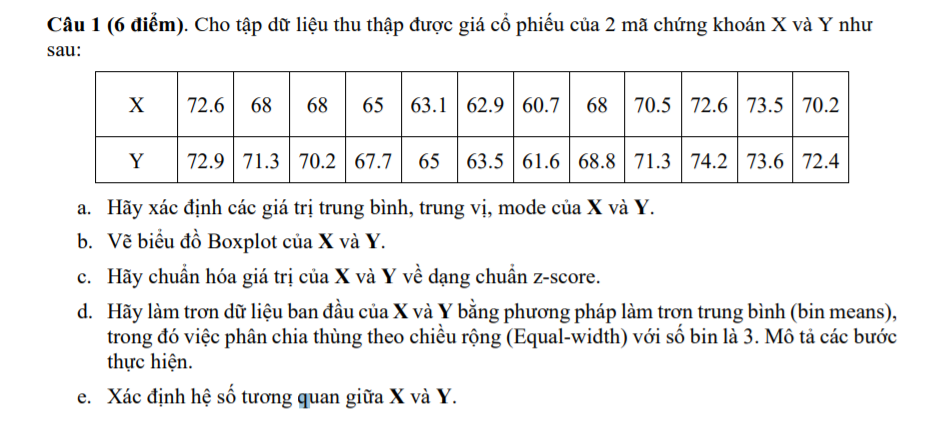

In [44]:
# Input
"""X = [7,8.5,8.6,9.1,4.5,5.3,6.7,6.5,7,6,5.5,7]
Y = [7.2,8,8.5,8.5,5.5,6,7.5,8.5,6,6.5,6.8,9]"""
X = [72.6,68,68,65,63.1,62.9,60.7,68,70.5,72.6,73.5,70.2]
Y = [72.9,71.3,70.2,67.7,65,63.5,61.6,68.8,71.3,74.2,73.6,72.4]
# Câu a
X_sorted=sorted(X)
Y_sorted=sorted(Y)
print(f"Câu a: n={len(X)}\nSắp xếp:\nX:{X_sorted}\nY:{Y_sorted}")
def data_describe(data):
    from math import sqrt
    n= len(data)
    x_tb = sum(data)/n 
    median=(sum(data[n//2-1:n//2+1])/2, data[n//2])[n % 2]
    #Tìm mode
    data_set= list(set(data))
    maxcount=data.count(data_set[0])
    for i in sorted(data_set):
        if data.count(i)>maxcount:     # maxcount dùng để tìm mode
            maxcount=data.count(i)
    mode= [i for i in data_set if data.count(i)==maxcount]
    #Tìm độ lệch chuẩn
    x2 = [i**2 for i in data]  
    x2_tb = sum(x2)/n  
    std = sqrt(n/(n-1)*(x2_tb-x_tb**2))
    return [round(x_tb,2),median,mode,round(std,3)]
x= data_describe(X_sorted)
y= data_describe(Y_sorted)
print(f"*X:\n\tmean_x=({X[0]}+{X[1]}+...+{X[-1]})/{len(X)}={x[0]}\n\tmedian_x=viết biểu thức={x[1]}\n\tmode_x={x[2]}\
(xuất hiện {X.count(x[2][0])} lần)\n\tvar_x=công thức=({X[0]}^2+{X[1]}^2+...+{X[-1]}^2)/{len(X)}-{x[0]}^2={x[3]**2} =>std_x=căn({x[3]**2})={x[3]}")
print(f"*Y:\n\tmean_=({Y[0]}+{Y[1]}+...+{Y[-1]})/{len(Y)}={y[0]}\n\tmedian_y=viết biểu thức={y[1]}\n\tmode_y={y[2]}\
(xuất hiện {Y.count(y[2][0])} lần)\n\tvar_y=công thức=({Y[0]}^2+{Y[1]}^2+...+{Y[-1]}^2)/{len(Y)}-{y[0]}^2={y[3]**2} =>std_y=căn({y[3]**2})={y[3]}")
# Câu b
def outlier_check(data,rangedata):
    outliers=[elem for elem in data if elem>rangedata[1] or elem<rangedata[0]]
    if len(outliers)==0:
        print("\t=>Không có phần tử ngoại lai.")
    else:
        print("\t=>Phần tử ngoại lai:",outliers)
from statistics import quantiles
q1_x,q2_x,q3_x = quantiles(X_sorted,n=4)
q1_y,q2_y,q3_y = quantiles(Y_sorted,n=4)
IQR_x=q3_x-q1_x
IQR_y=q3_y-q1_y
range_x=[q1_x-1.5*IQR_x,q2_x+1.5*IQR_x]
range_y=[q1_y-1.5*IQR_y,q2_y+1.5*IQR_y]
print(f"Câu b:\n*X:\t q1={q1_x} q2={q2_x} q3={q3_x}\n\tIQR={q3_x}-{q1_x}={IQR_x} =>{range_x}")
outlier_check(X,range_x)
print(f"*Y:\t q1={q1_y} q2={q2_y} q3={q3_y}\n\tIQR={q3_y}-{q1_y}={IQR_y} =>{range_y}")
outlier_check(Y,range_y)
"""import matplotlib.pyplot as plt
plt.boxplot([X_sorted, Y_sorted], 
            labels = ['X', 'Y'],
            showfliers = True)
plt.title('Biểu đồ Boxplot của câu b')
plt.xlabel('Classes')
plt.ylabel('Gía trị của X,Y')"""
# Câu c chuẩn hóa z-score
def z_score_normalization(xi,A_tb,std):
    return round((xi-A_tb)/std,2)
def min_max_nomalization(xi,min_A,max_A): #Phòng trường hợp yêu cầu chuẩn hóa min max
    return round((xi-min_A)/(max_A-min_A),2)
#X
print(f"Câu c:\n\tAtb\tstd\nX\t{x[0]}\t{x[3]}\nY\t{y[0]}\t{y[3]}")
print(f"ADCT với X:\n\tx1'=(x1-Atb)/std_x={z_score_normalization(X[0],x[0],x[3])}")
print("Tương tự ta được:")
z_scores_X=[z_score_normalization(i,x[0],x[3]) for i in X]
print("X : ",end=" ")
for i in X:
    print(str(i).center(5),end=" ")
print("\nZ-X:",end=" ")
for i in z_scores_X:
    print(str(i).center(5),end=" ")
#Y
print(f"\nADCT với Y:\n\ty1'=(y1-Atb)/std_y={z_score_normalization(Y[0],y[0],y[3])}")
print("Tương tự ta được:")
z_scores_Y=[z_score_normalization(i,y[0],y[3]) for i in Y]
print("Y : ",end=" ")
for i in Y:
    print(str(i).center(5),end=" ")
print("\nZ-Y:",end=" ")
for i in z_scores_Y:
    print(str(i).center(5),end=" ")
#Câu d hệ số tương quan
def r_AB(A,B,Atb,Btb,stdA,stdB):
    n_=len(A)
    aibi=[A[i]*B[j] for i in range(len(A)) for j in range(len(B)) if i==j ]
    return round((sum(aibi)-n_*Atb*Btb)/(n_*stdA*stdB),5)
print(f"\nCâu d:\nr_XY= viết công thức=({X[0]}*{Y[0]}+{X[1]}*{Y[1]}+...+{X[-1]}*\
{Y[-1]}-{len(X)}*{x[0]}*{y[0]})/{len(X)}*{x[3]}*{y[3]}={r_AB(X,Y,x[0],y[0],x[3],y[3])}")
# Câu e làm trơn dữ liệu
print("Câu e:")
# equal frequency (depth)
def equifreq(arr1, m):   
    a = len(arr1)
    n = int(a / m)
    arri=[]
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        arri.append(arr)
    return arri
# equal width
def equiwidth(arr1, m):
    a = len(arr1)
    w = int((max(arr1) - min(arr1)) / m)
    min1 = min(arr1)
    arr = []
    for i in range(0, m + 1):
        arr = arr + [min1 + w * i]
    arri=[]
     
    for i in range(0, m):
        temp = []
        for j in arr1:
            if j >= arr[i] and j <= arr[i+1]:
                temp += [j]
        arri += [temp]
    return arri
print(f"X: n={len(X)} Ví dụ với m=3( tùy chỉnh theo đề bài) \nVới equal-width:{equiwidth(X,3)}")

Câu a: n=12
Sắp xếp:
X:[60.7, 62.9, 63.1, 65, 68, 68, 68, 70.2, 70.5, 72.6, 72.6, 73.5]
Y:[61.6, 63.5, 65, 67.7, 68.8, 70.2, 71.3, 71.3, 72.4, 72.9, 73.6, 74.2]
*X:
	mean_x=(72.6+68+...+70.2)/12=67.92
	median_x=viết biểu thức=68.0
	mode_x=[68](xuất hiện 3 lần)
	var_x=công thức=(72.6^2+68^2+...+70.2^2)/12-67.92^2=17.8084 =>std_x=căn(17.8084)=4.22
*Y:
	mean_=(72.9+71.3+...+72.4)/12=69.38
	median_y=viết biểu thức=70.75
	mode_y=[71.3](xuất hiện 2 lần)
	var_y=công thức=(72.9^2+71.3^2+...+72.4^2)/12-69.38^2=17.098225 =>std_y=căn(17.098225)=4.135
Câu b:
*X:	 q1=63.575 q2=68.0 q3=72.07499999999999
	IQR=72.07499999999999-63.575=8.499999999999986 =>[50.825000000000024, 80.74999999999997]
	=>Không có phần tử ngoại lai.
*Y:	 q1=65.675 q2=70.75 q3=72.775
	IQR=72.775-65.675=7.1000000000000085 =>[55.024999999999984, 81.4]
	=>Không có phần tử ngoại lai.
Câu c:
	Atb	std
X	67.92	4.22
Y	69.38	4.135
ADCT với X:
	x1'=(x1-Atb)/std_x=1.11
Tương tự ta được:
X :   72.6   68    68    65   63.1  62.9  60.7   68 

In [45]:
equiwidth(Y,3)

[[65, 63.5, 61.6], [67.7, 68.8], [72.9, 71.3, 70.2, 71.3, 73.6, 72.4]]

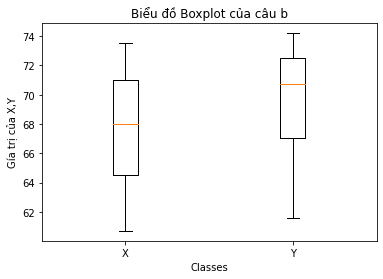

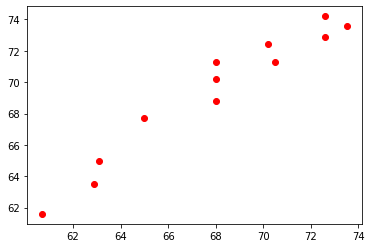

In [42]:
#Biểu đồ của câu b
import matplotlib.pyplot as plt
plt.boxplot([X_sorted, Y_sorted], 
            labels = ['X', 'Y'],
            showfliers = True)
plt.title('Biểu đồ Boxplot của câu b')
plt.xlabel('Classes')
plt.ylabel('Gía trị của X,Y')
plt.show()
plt.plot(X,Y,'ro',label='data')
plt.show()

#### Bài tập tìm trung vị
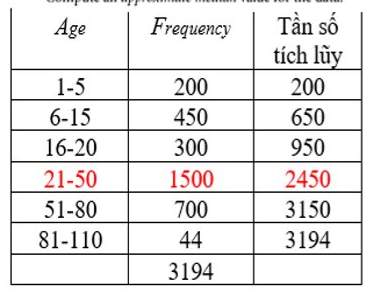
***Các tham số cần tìm:***<br />
Tổ chứa trung vị: có tần số tích lũy gần nhất >(N/2)<br />
$N$: Số giá trị trong tập dữ liệu<br />
$L1$: biên dưới của khoảng trung vị<br />
$\sum freq_l$ : tần số tích lũy của các khoảng nhỏ hơn trung vị<br />
$freq_median$: tần số của khoảng trung vị <br />
$width$: chiều rộng của khoảng trung vị

In [3]:
L1=21
N=3194
freql= 950
freqmedian=1500
width=50-L1
median= L1+(N/2-freql)/freqmedian*width
print(median)

33.50866666666667


### Bài tập tìm ma trận khác biệt
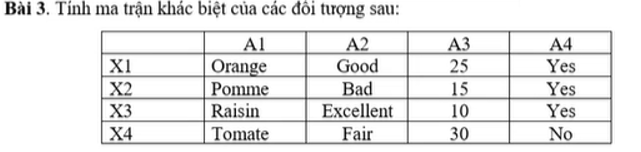
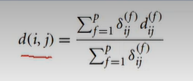
Ví dụ khi adct:(không lq đến đề bài)
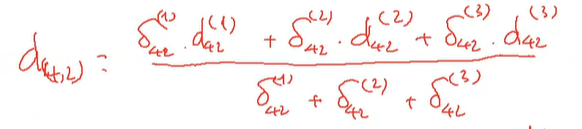

In [24]:
table={
    1:["Orange",2/3,25,1],
    2:["Pomme",0,15,1],
    3:["Raisin",1,10,1],
    4:["Tomate",1/3,30,0]
}
A1= [i[0] for i in table.values()]
A2= [i[1] for i in table.values()]
A3= [i[2] for i in table.values()]
A4= [i[3] for i in table.values()]
A=[A1,A2,A3,A4]
def difference(obj1,obj2):
    dt1= table[obj1]
    dt2= table[obj2]
    ts=0
    ms=0
    for i in range(len(dt1)):
        dt,dist= delta_n_dis(dt1[i],dt2[i],A[i])
        ts+=dt*dist
        ms+=dt
    return round(ts/ms,2)
def delta_n_dis(a,b,column):
    if type(a)==str and type(b)==str:
        if len(a)==0 or len(b)==0:
            delta=0
        else:
            delta=1
        if a==b:
            dis=0
        else:
            dis=1
    else:
        if  a==b==0:
            delta=0
        else:
            delta=1
        dis=abs(a-b)/(max(column)-min(column))
    return [delta,dis]
difference_matrix=[
    [0,0,0,0],
    [difference(2,1),0,0,0],
    [difference(3,1),difference(3,2),0,0],
    [difference(4,1),difference(4,2),difference(4,3),0]
]
for i in difference_matrix:
    print(i)

[0, 0, 0, 0]
[0.54, 0, 0, 0]
[0.52, 0.56, 0, 0]
[0.65, 0.77, 0.92, 0]


In [25]:
table={
    1:["code A",1,45],
    2:["code B",0,22],
    3:["code C",1/2,64],
    4:["code A",1,28]
}
A1= [i[0] for i in table.values()]
A2= [i[1] for i in table.values()]
A3= [i[2] for i in table.values()]
A=[A1,A2,A3]
def difference(obj1,obj2):
    dt1= table[obj1]
    dt2= table[obj2]
    ts=0
    ms=0
    for i in range(len(dt1)):
        dt,dist= delta_n_dis(dt1[i],dt2[i],A[i])
        ts+=dt*dist
        ms+=dt
    return round(ts/ms,2)
def delta_n_dis(a,b,column):
    if type(a)==str and type(b)==str:
        if len(a)==0 or len(b)==0:
            delta=0
        else:
            delta=1
        if a==b:
            dis=0
        else:
            dis=1
    else:
        if  a==b==0:
            delta=0
        else:
            delta=1
        dis=abs(a-b)/(max(column)-min(column))
    return [delta,dis]
difference_matrix=[
    [0,0,0,0],
    [difference(2,1),0,0,0],
    [difference(3,1),difference(3,2),0,0],
    [difference(4,1),difference(4,2),difference(4,3),0]
]
for i in difference_matrix:
    print(i)

[0, 0, 0, 0]
[0.85, 0, 0, 0]
[0.65, 0.83, 0, 0]
[0.13, 0.71, 0.79, 0]


## Thuật toán Apriori khai phá luật kết hợp

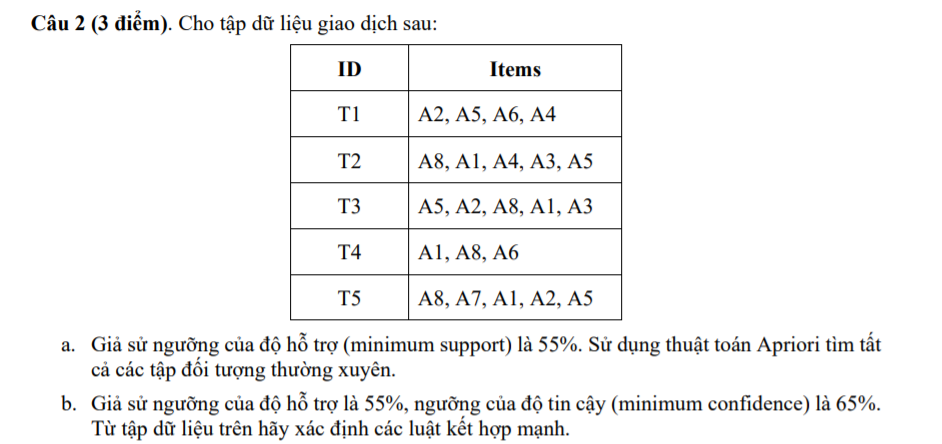

In [5]:
#Function
def my_round(num):
    """Dùng để làm tròn"""
    if num %1 ==0:
        return num
    else:
        return num-(num%1)+1
def sup_count(list_item,data):
    sp_count=0
    for value in data.values():
        count=0
        for items in list_item:
            if items in value:
                count+=1
        if count==len(list_item):
            sp_count+=1
    return sp_count
def check_it_can_generate(check,length):
    items=set(check)
    count=0
    for item in items:
        if check.count(item)==length:
            count+=1
    if count==len(items):
        return True
    else:
        return False
def apriori_gen(L):
    n=len(L[0])
    C =[]
    for i in range(len(L)-n):
        genter1=L[i:i+n]
        check = []
        for x in range(len(genter1)):
            check +=genter1[x]
        for j in range(i,len(L)-n):
            genter2=L[j+n]
            check +=genter2
            if check_it_can_generate(check,n):
                generated=sorted(set(check))
                C.append(generated)
                for f in genter2:
                    check.remove(f)
            else:
                for f in genter2:
                    check.remove(f)
        if n>1:
            genter3=L[i]+L[i+n]
            check2 = [i for i in genter3]
            for p in range(i+n,len(L)-1):
                genter4=L[p+1]
                check2 +=genter4
                if check_it_can_generate(check2,n):
                    generated=sorted(set(check2))
                    C.append(generated)
                    for f in genter4:
                        check2.remove(f)
                else:
                    for f in genter4:
                        check2.remove(f)
    return C
def get_subsets(dtset):
    subsets=[[]]
    for elem in dtset:
    # iterate over the sub sets so far
        for subset in subsets:
            # add a new subset consisting of the subset at hand added elem
            subsets = subsets + [list(subset)+[elem]]
    subsets.remove(subsets[0])
    subsets.remove(subsets[-1])
    return subsets
def get_rest_set(sub,main):
    rest_set=[dt for dt in main]
    for x in sub:
        rest_set.remove(x)
    return rest_set
#Input

"""data={
    "T100":["I1","I2","I5"],
    "T200":["I2","I4"],
    "T300":["I2","I3"],
    "T400":["I1","I2","I4"],
    "T500":["I1","I3"],
    "T600":["I2","I3"],
    "T700":["I1","I3"],
    "T800":["I1","I2","I3","I5"],
    "T900":["I1","I2","I3"]
}"""
data={
    "T1":["A2","A5","A6","A4"],
    "T2":["A8","A1","A4","A3","A5"],
    "T3":["A5","A2","A8","A1","A3"],
    "T4":["A1","A8","A6"],
    "T5":["A8","A7","A1","A2","A5"]
}
min_sup=55/100
min_conf=65/100
min_sup_count= my_round(len(data.keys())*min_sup)

#Run
print(f"a. min_sup={min_sup*100}% => min_sup_count=[{min_sup*100}%*{len(data.keys())}]=[{len(data.keys())*min_sup}]={min_sup_count}")
#Mining association set
dem=0
Ci=[]
for v in data.values():
    Ci+=v
Ci=[[i] for i in sorted(set(Ci))]
association_sets=[]
result_a=[]
epoch=0
while True:
    epoch+=1
    Li=[]
    sup_counts=[]
    print(f"  C{epoch}\t\tsup_count    sup_count>={min_sup_count}---->")
    for i in range(len(Ci)):
        sup_counts.append(sup_count(Ci[i],data))
        print(f"  {Ci[i]}\t  {sup_counts[i]}")
    indexs=[i for i in range(len(sup_counts)) if sup_counts[i]>=min_sup_count]
    for i in indexs:
        Li.append(sup_counts[i])
    Ci=[Ci[i] for i in range(len(Ci)) if i in indexs]
    print(f"  L{epoch}\t\tsup_count")
    for i in range(len(Ci)):
        print(f"  {Ci[i]}\t  {Li[i]}")
    if len(Ci[0])>1:
        for i in Ci:
            association_sets +=[i]
            result_a +=[i]
    else:
        for i in Ci:
            result_a +=[i]
    generater= apriori_gen(Ci)
    if len(generater) == 0:
        break
    else:
        Ci=[i for i in generater]
print(f"Vậy các tập phổ biến là {result_a}")
# Mining associanton rules
print(f"b. Với min_conf={min_conf*100}%:")
for i in association_sets:
    sub_sets= get_subsets(i)
    n= sup_count(i,data)
    print(f"* l={i} . Tập con {sub_sets}")
    for j in sub_sets:
        rest_set=get_rest_set(j,i)
        k= sup_count(j,data)
        ans= "Thỏa mãn" if n/k>=min_conf else "Không thỏa mãn"
        print(f"\t{j}->{rest_set}: conf={n}/{k}={round(n/k*100,2)}% => {ans}")

a. min_sup=55.00000000000001% => min_sup_count=[55.00000000000001%*5]=[2.75]=3.0
  C1		sup_count    sup_count>=3.0---->
  ['A1']	  4
  ['A2']	  3
  ['A3']	  2
  ['A4']	  2
  ['A5']	  4
  ['A6']	  2
  ['A7']	  1
  ['A8']	  4
  L1		sup_count
  ['A1']	  4
  ['A2']	  3
  ['A5']	  4
  ['A8']	  4
  C2		sup_count    sup_count>=3.0---->
  ['A1', 'A2']	  2
  ['A1', 'A5']	  3
  ['A1', 'A8']	  4
  ['A2', 'A5']	  3
  ['A2', 'A8']	  2
  ['A5', 'A8']	  3
  L2		sup_count
  ['A1', 'A5']	  3
  ['A1', 'A8']	  4
  ['A2', 'A5']	  3
  ['A5', 'A8']	  3
  C3		sup_count    sup_count>=3.0---->
  ['A1', 'A5', 'A8']	  3
  L3		sup_count
  ['A1', 'A5', 'A8']	  3
Vậy các tập phổ biến là [['A1'], ['A2'], ['A5'], ['A8'], ['A1', 'A5'], ['A1', 'A8'], ['A2', 'A5'], ['A5', 'A8'], ['A1', 'A5', 'A8']]
b. Với min_conf=65.0%:
* l=['A1', 'A5'] . Tập con [['A1'], ['A5']]
	['A1']->['A5']: conf=3/4=75.0% => Thỏa mãn
	['A5']->['A1']: conf=3/4=75.0% => Thỏa mãn
* l=['A1', 'A8'] . Tập con [['A1'], ['A8']]
	['A1']->['A8']: conf=4/4=

***Khoảng cách và độ tương tự cosin***
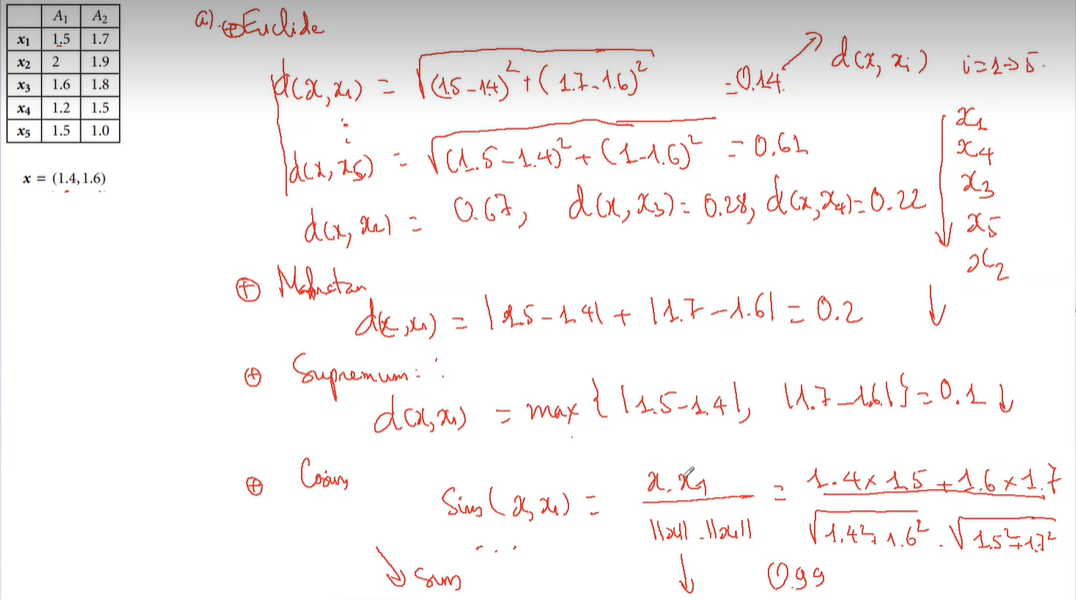
***Lưu ý: Độ tương tự cosin càng gần 1 thì càng giống nhau***

## Thuật toán k-means

***Với 2 cụm***
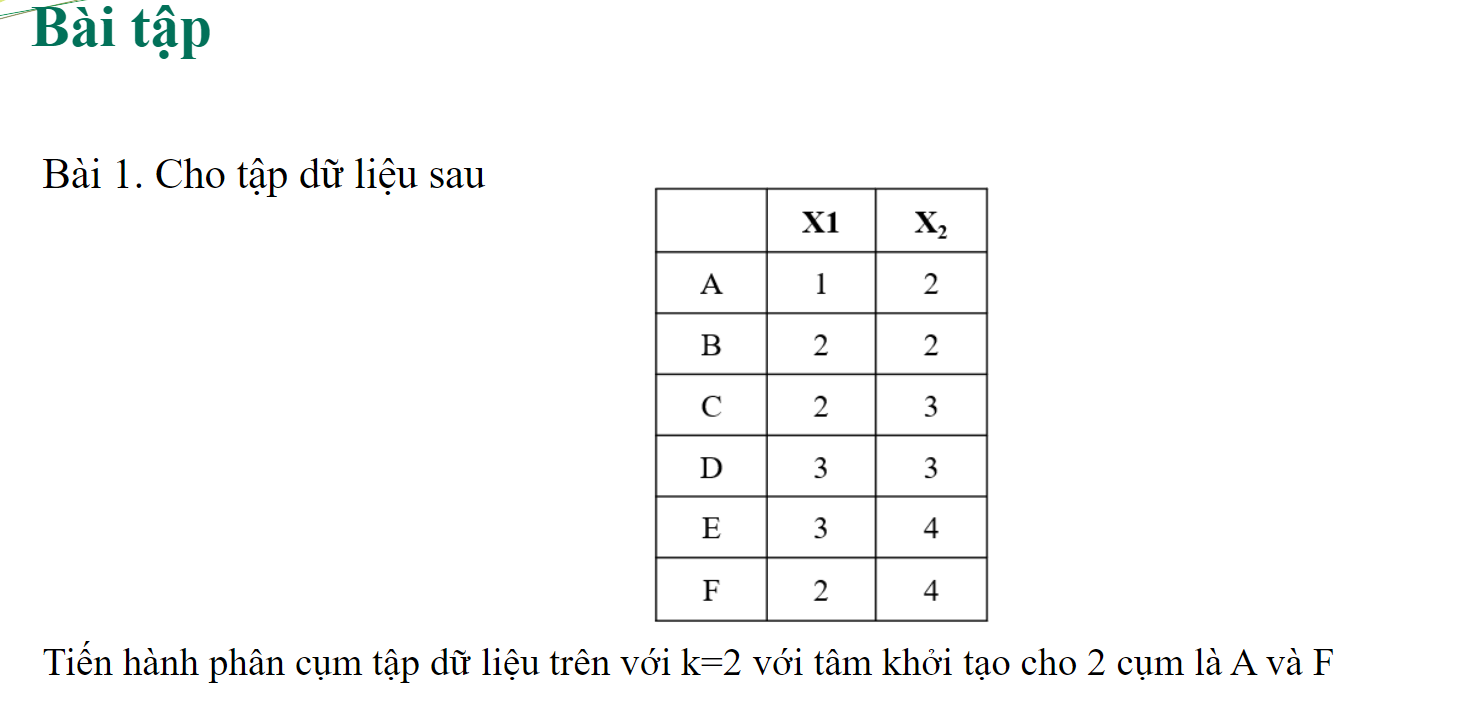

In [52]:
#Input
A=[1,2]
B=[2,2]
C=[2,3]
D=[3,3]
E=[3,4]
F=[2,4]
points=[A,B,C,D,E,F]
alphabets=["A","B","C","D","E","F"]
C1=[i for i in A]
C2=[i for i in F]
#Run
def euclid_distance(a,b):
    from math import sqrt
    return sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
def mahattan_distance(a,b):
    return abs(b[0]-a[0])+abs(b[1]-a[1])
def supremum_distance(a,b):
    dis=[abs(b[0]-a[0]),abs(b[1]-a[1])]
    return max(dis)
def cosin_similarity(a,b):
    from math import sqrt
    return (a[0]*b[0]+a[1]*b[1])/(sqrt(a[0]**2+a[1]**2)*sqrt(b[0]**2+b[1]**2))
def C_update(points):
    a= [i[0] for i in points]
    b= [i[1] for i in points]
    return [sum(a)/len(a),sum(b)/len(b)]
C_list=[]
epoch=0
while True:
    epoch+=1
    alpha1=[]
    alpha2=[]
    dis1=[]
    dis2=[]
    labels=[]
    point1=[]
    point2=[]
    for i in points:
        distance1= euclid_distance(C1,i)
        distance2= euclid_distance(C2,i)
        dis1.append(round(distance1,3))
        dis2.append(round(distance2,3))
        if distance1<distance2:
            labels.append("1")
        else:
            labels.append("2")
    print(f"Lặp {epoch}:")
    print(f"\tC1{C1}\tC2{C2}\tCụm")
    for i in range(len(labels)):
        print(f"{alphabets[i]}{points[i]}\t  {dis1[i]}\t\t {dis2[i]}\t\t {labels[i]}")
    alpha1=[alphabets[i] for i in range(len(labels)) if labels[i]=="1"]
    alpha2=[alphabets[i] for i in range(len(labels)) if labels[i]=="2"]
    point1=[points[i] for i in range(len(labels)) if labels[i]=="1"]
    point2=[points[i] for i in range(len(labels)) if labels[i]=="2"]
    print(f"Cụm 1:{alpha1}  Cụm 2:{alpha2}")
    if C1 == C_update(point1) and C2== C_update(point2):
        print("Viết biểu thức cập nhật trọng tâm:\n => Không có sự thay đổi tâm cụm => Dừng thuật toán")
        break
    else:
        C1= C_update(point1)
        C2= C_update(point2)
    print(f"Cập nhật trọng tâm:\n C1= viết biểu thức={C1}\n C2= viết biểu thức={C2}")

Lặp 1:
	C1[1, 2]	C2[2, 4]	Cụm
A[1, 2]	  0.0		 2.236		 1
B[2, 2]	  1.0		 2.0		 1
C[2, 3]	  1.414		 1.0		 2
D[3, 3]	  2.236		 1.414		 2
E[3, 4]	  2.828		 1.0		 2
F[2, 4]	  2.236		 0.0		 2
Cụm 1:['A', 'B']  Cụm 2:['C', 'D', 'E', 'F']
Cập nhật trọng tâm:
 C1= viết biểu thức=[1.5, 2.0]
 C2= viết biểu thức=[2.5, 3.5]
Lặp 2:
	C1[1.5, 2.0]	C2[2.5, 3.5]	Cụm
A[1, 2]	  0.5		 2.121		 1
B[2, 2]	  0.5		 1.581		 1
C[2, 3]	  1.118		 0.707		 2
D[3, 3]	  1.803		 0.707		 2
E[3, 4]	  2.5		 0.707		 2
F[2, 4]	  2.062		 0.707		 2
Cụm 1:['A', 'B']  Cụm 2:['C', 'D', 'E', 'F']
Viết biểu thức cập nhật trọng tâm:
 => Không có sự thay đổi tâm cụm => Dừng thuật toán


***Với 3 cụm***

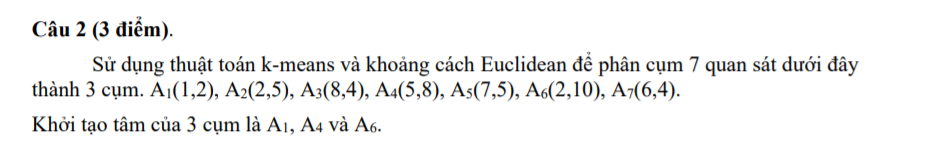

In [4]:
#Input
A1=[1,2]
A2=[2,5]
A3=[8,4]
A4=[5,8]
A5=[7,5]
A6=[2,10]
A7=[6,4]
points=[A1,A2,A3,A4,A5,A6,A7]
alphabets=["A1","A2","A3","A4","A5","A6","A7"]
Center1=[i for i in A1]
Center2=[i for i in A4]
Center3=[i for i in A6]

# Distances and update cluster_center function
def euclid_distance(a,b):
    from math import sqrt
    return sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)
def mahattan_distance(a,b):
    return abs(b[0]-a[0])+abs(b[1]-a[1])
def supremum_distance(a,b):
    dis=[abs(b[0]-a[0]),abs(b[1]-a[1])]
    return max(dis)
def cosin_similarity(a,b):
    from math import sqrt
    return (a[0]*b[0]+a[1]*b[1])/(sqrt(a[0]**2+a[1]**2)*sqrt(b[0]**2+b[1]**2))
def C_update(points):
    a= [i[0] for i in points]
    b= [i[1] for i in points]
    return [round(sum(a)/len(a),3),round(sum(b)/len(b),3)]
# Algomrithm
epoch=0
while True:
    epoch+=1
    alpha1=[]
    alpha2=[]
    alpha3=[]
    dis1=[]
    dis2=[]
    dis3=[]
    labels=[]
    point1=[]
    point2=[]
    point3=[]
    for i in points:
        distance1= euclid_distance(Center1,i)
        distance2= euclid_distance(Center2,i)
        distance3= euclid_distance(Center3,i)
        dis1.append(round(distance1,3))
        dis2.append(round(distance2,3))
        dis3.append(round(distance3,3))
        min_distance = min([distance1,distance2,distance3])
        if distance1==min_distance:
            labels.append("1")
        elif distance2==min_distance:
            labels.append("2")
        else:
            labels.append("3")
    print(f"Lặp {epoch}:")
    print(f"\t\tC1{Center1}\tC2{Center2}\tC3{Center3}\tCụm")
    for i in range(len(labels)):
        print(f"{alphabets[i]}{points[i]}\t  {dis1[i]}\t\t {dis2[i]}\t\t {dis3[i]}\t\t {labels[i]}")
    alpha1=[alphabets[i] for i in range(len(labels)) if labels[i]=="1"]
    alpha2=[alphabets[i] for i in range(len(labels)) if labels[i]=="2"]
    alpha3=[alphabets[i] for i in range(len(labels)) if labels[i]=="3"]
    point1=[points[i] for i in range(len(labels)) if labels[i]=="1"]
    point2=[points[i] for i in range(len(labels)) if labels[i]=="2"]
    point3=[points[i] for i in range(len(labels)) if labels[i]=="3"]
    print(f"Cụm 1:{alpha1}  Cụm 2:{alpha2} Cụm 3:{alpha3}")
    if Center1 == C_update(point1) and Center2== C_update(point2) and Center3==C_update(point3):
        print("Viết biểu thức cập nhật trọng tâm:\n => Không có sự thay đổi tâm cụm => Dừng thuật toán")
        break
    else:
        Center1= C_update(point1)
        Center2= C_update(point2)
        Center3= C_update(point3)
    print(f"Cập nhật trọng tâm:\n C1= viết biểu thức={Center1}\n C2= viết biểu thức={Center2}\n C3= viết biểu thức={Center3}")

Lặp 1:
		C1[1, 2]	C2[5, 8]	C3[2, 10]	Cụm
A1[1, 2]	  0.0		 7.211		 8.062		 1
A2[2, 5]	  3.162		 4.243		 5.0		 1
A3[8, 4]	  7.28		 5.0		 8.485		 2
A4[5, 8]	  7.211		 0.0		 3.606		 2
A5[7, 5]	  6.708		 3.606		 7.071		 2
A6[2, 10]	  8.062		 3.606		 0.0		 3
A7[6, 4]	  5.385		 4.123		 7.211		 2
Cụm 1:['A1', 'A2']  Cụm 2:['A3', 'A4', 'A5', 'A7'] Cụm 3:['A6']
Cập nhật trọng tâm:
 C1= viết biểu thức=[1.5, 3.5]
 C2= viết biểu thức=[6.5, 5.25]
 C3= viết biểu thức=[2.0, 10.0]
Lặp 2:
		C1[1.5, 3.5]	C2[6.5, 5.25]	C3[2.0, 10.0]	Cụm
A1[1, 2]	  1.581		 6.388		 8.062		 1
A2[2, 5]	  1.581		 4.507		 5.0		 1
A3[8, 4]	  6.519		 1.953		 8.485		 2
A4[5, 8]	  5.701		 3.132		 3.606		 2
A5[7, 5]	  5.701		 0.559		 7.071		 2
A6[2, 10]	  6.519		 6.543		 0.0		 3
A7[6, 4]	  4.528		 1.346		 7.211		 2
Cụm 1:['A1', 'A2']  Cụm 2:['A3', 'A4', 'A5', 'A7'] Cụm 3:['A6']
Viết biểu thức cập nhật trọng tâm:
 => Không có sự thay đổi tâm cụm => Dừng thuật toán


In [49]:
my_round(num)

1.0